In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_init = pd.read_csv("runs.csv")
df = df_init[["Run ID", "_name_or_path", "epoch", "learning_rate", "per_device_train_batch_size", "eval_f1", "eval_aucun_f1", "eval_geogFeat geogName_f1", "eval_geogFeat_f1", "eval_geogName_f1"]]

df = df.rename(columns={
    "Run ID": "run_id",
    "_name_or_path": "pre-trained_model",
    "epoch": "nb_epoch",
    "learning_rate": "learning_rate",
    "per_device_train_batch_size": "batch_size",
    "eval_f1": "eval_f1",
    "eval_aucun_f1": "eval_aucun_f1",
    "eval_geogFeat geogName_f1": "eval_geogFeat_geogName_f1",
    "eval_geogFeat_f1": "eval_geogFeat_f1",
    "eval_geogName_f1": "eval_geogName_f1"
})
df = df.sort_values("batch_size")

custom_order = ["xlm-roberta-large", "camembert-base", "camembert/camembert-large"]
df["pre-trained_model"] = pd.Categorical(df["pre-trained_model"], categories=custom_order, ordered=True)
df = df.sort_values("pre-trained_model")

replace_dict = {
    "camembert/camembert-large": "camembert-large",
}

df["pre-trained_model"] = df["pre-trained_model"].replace(replace_dict)

In [68]:
df_table = df.drop(columns=['run_id'])
df_table

,pre-trained_model,nb_epoch,learning_rate,batch_size,eval_f1,eval_aucun_f1,eval_geogFeat_geogName_f1,eval_geogFeat_f1,eval_geogName_f1
0,xlm-roberta-large,10,0.00002,8,0.925417,0.927224,0.931459,0.914498,0.913793
9,camembert-base,10,0.00002,8,0.888046,0.899909,0.911917,0.859671,0.821530
7,camembert-large,10,0.00002,4,0.928420,0.934001,0.952715,0.899106,0.893372
1,camembert-large,10,0.00002,8,0.933333,0.929800,0.972603,0.920162,0.886486
2,camembert-large,10,0.00002,8,0.950820,0.952336,0.969466,0.910786,0.968198
8,camembert-large,10,0.00002,8,0.931677,0.930406,0.966038,0.907243,0.903226
10,camembert-large,10,0.00002,8,0.943740,0.948413,0.942623,0.932584,0.931973
11,camembert-large,10,0.00002,8,0.935917,0.942518,0.956063,0.909561,0.902077
3,camembert-large,10,0.00002,16,0.950071,0.946855,0.979592,0.915436,0.971014
4,camembert-large,10,0.00001,16,0.950000,0.946237,0.975610,0.919137,0.978261


In [64]:
previous_name = ""
result_df = pd.DataFrame()
for index, row in df.iterrows():
    run = row["run_id"]
    df_run = pd.read_csv(f"0/{run}/metrics/eval_f1", header=None, names=["nb_data_point", "F1", "step"], sep=" ")
    name = f'{row["pre-trained_model"]}_{row["batch_size"]}_{row["learning_rate"]}_{row["nb_epoch"]}'
    df_run["name"] = name
    previous_name = name
    result_df = pd.concat([result_df, df_run], ignore_index=True)

In [65]:
result_df

,nb_data_point,F1,step,name
0,1685699246665,0.798412,192,xlm-roberta-large_8_2e-05_10
1,1685699309357,0.842409,384,xlm-roberta-large_8_2e-05_10
2,1685699372040,0.856841,576,xlm-roberta-large_8_2e-05_10
3,1685699434618,0.883546,768,xlm-roberta-large_8_2e-05_10
4,1685699489859,0.900126,960,xlm-roberta-large_8_2e-05_10
...,...,...,...,...
125,1689152472911,0.917281,1024,camembert-large_24_2e-05_20
126,1689152510604,0.916018,1088,camembert-large_24_2e-05_20
127,1689152547151,0.921938,1152,camembert-large_24_2e-05_20
128,1689152584904,0.926436,1216,camembert-large_24_2e-05_20


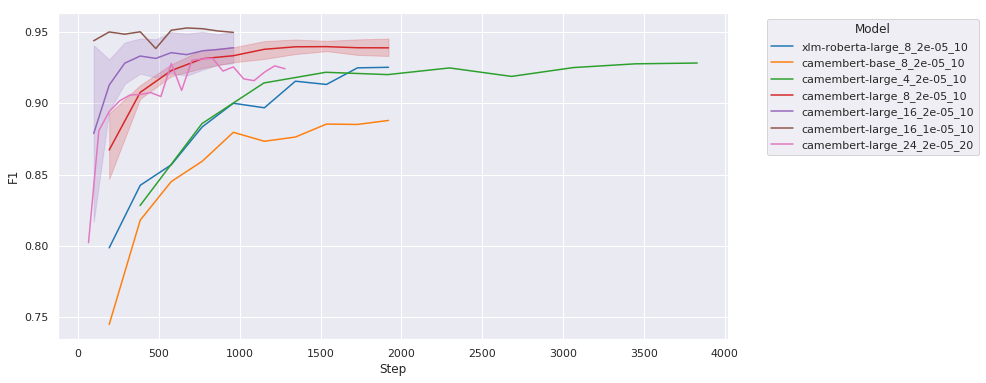

In [66]:

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
custom_palette = sns.color_palette("tab10", n_colors=len(result_df['name'].unique()))
plot = sns.lineplot(x='step', y='F1', hue='name', data=result_df, palette=custom_palette)

# Set plot title and labels
#plot.set_title('F1 values over steps for each model')
plot.set_xlabel('Step')
plot.set_ylabel('F1')

# Show the legend
plot.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()